In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [58]:
dict1 ={'Name (student)':['Priyang','Aadhya', 'Aadhya','Krisha','Vedant','Parshv',
                'Mittal','Archana'],
                'Marks':[98,89, 89,99,np.nan,90,83,99],
                'Gender':['Male','Female', 'Female','Female','Male','Male',
                         'Female',np.nan]
               }
df1=pd.DataFrame(dict1)
df1

,Name (student),Marks,Gender
0,Priyang,98.0,Male
1,Aadhya,89.0,Female
2,Aadhya,89.0,Female
3,Krisha,99.0,Female
4,Vedant,NaN,Male
5,Parshv,90.0,Male
6,Mittal,83.0,Female
7,Archana,99.0,NaN


In [59]:
# 1. Display Top 3 Rows of The Dataset
df1.head(3)

,Name (student),Marks,Gender
0,Priyang,98.0,Male
1,Aadhya,89.0,Female
2,Aadhya,89.0,Female


In [60]:
# 2. Check Last 3 Rows of The Dataset
df1.tail(3)

,Name (student),Marks,Gender
5,Parshv,90.0,Male
6,Mittal,83.0,Female
7,Archana,99.0,NaN


In [61]:
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
print(df1.shape)
print(df1.shape[0])
print(df1.shape[1])

(8, 3)
8
3


In [62]:
# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column ,Memory Requirement, null values
print(len(df1),'\n')
print(len(df1.columns),'\n')
print(df1.dtypes,'\n\n')
df1.info()

8 

3 

Name (student)     object
Marks             float64
Gender             object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name (student)  8 non-null      object 
 1   Marks           7 non-null      float64
 2   Gender          7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 320.0+ bytes


In [63]:
# 5. Check Missing Values In The Dataset
print(df1.isnull().any(),'\n\n')
print(df1.isnull().sum().sort_values(ascending= False),'\n')
print(df1.isnull().sum(axis=0),'\n') # column by column
print(df1.isnull().sum(axis=1)) # row by row

Name (student)    False
Marks              True
Gender             True
dtype: bool 


Gender            1
Marks             1
Name (student)    0
dtype: int64 

Name (student)    0
Marks             1
Gender            1
dtype: int64 

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
dtype: int64


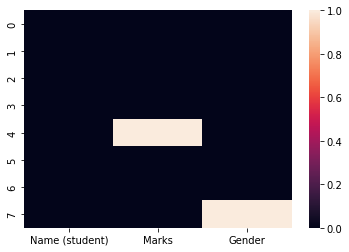

In [64]:
import seaborn as sns
missing= df1.isnull()
sns.heatmap(missing)

  Name (student)  Marks  Gender
0        Priyang   98.0    Male
1         Aadhya   89.0  Female
2         Aadhya   89.0  Female
3         Krisha   99.0  Female
5         Parshv   90.0    Male
6         Mittal   83.0  Female


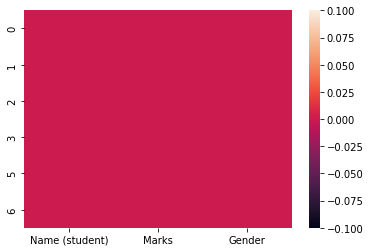

In [65]:
# 6. Drop All The Missing Values
import seaborn as sns
df1= df1.dropna()
print(df1)
missing= df1.isnull()
sns.heatmap(missing)

In [66]:
# 7. check for duplicate values
df1.duplicated().any()

True

In [67]:
df1 = df1.drop_duplicates()
df1

,Name (student),Marks,Gender
0,Priyang,98.0,Male
1,Aadhya,89.0,Female
3,Krisha,99.0,Female
5,Parshv,90.0,Male
6,Mittal,83.0,Female


In [68]:
# 8. there was a blank in some columns (Name (student). We removed them
df1.columns=[i.split()[0]+"_"+i.split()[1]  if len(i.split())>1 else i for i in df1.columns]
df1.columns

Index(['Name_(student)', 'Marks', 'Gender'], dtype='object')

In [69]:
# 9. and remove paranthesis
df1= df1.rename(columns={'Name_(student)':'RName_student'})
df1


,RName_student,Marks,Gender
0,Priyang,98.0,Male
1,Aadhya,89.0,Female
3,Krisha,99.0,Female
5,Parshv,90.0,Male
6,Mittal,83.0,Female


In [76]:
# 10. Getting some numeric informations (max, min, count,std, mean, meadian)about the data_movies
print(df1.describe(),'\n\n') # OR   print(df1.describe(exclude='object'))
print(df1.describe(include='object'),'\n\n')
print(df1.describe(include='all'))


           Marks
count   5.000000
mean   91.800000
std     6.685806
min    83.000000
25%    89.000000
50%    90.000000
75%    98.000000
max    99.000000 


       RName_student  Gender
count              5       5
unique             5       2
top           Krisha  Female
freq               1       3 


       RName_student      Marks  Gender
count              5   5.000000       5
unique             5        NaN       2
top           Krisha        NaN  Female
freq               1        NaN       3
mean             NaN  91.800000     NaN
std              NaN   6.685806     NaN
min              NaN  83.000000     NaN
25%              NaN  89.000000     NaN
50%              NaN  90.000000     NaN
75%              NaN  98.000000     NaN
max              NaN  99.000000     NaN


In [90]:
# 11. find unique values from Gender columns
unique_Gender= df1['Gender'].value_counts()
print(unique_Gender,'\n')
print(len(unique_Gender),'\n') 
print('################################## \n')
print(df1['Gender'].unique(),'\n')
print(df1['Gender'].nunique())




Female    3
Male      2
Name: Gender, dtype: int64 

2 

################################## 

['Male' 'Female'] 

2


In [115]:
# 12. Find total number of students having  mark between 90 and 100
print((df1['Marks']>= 88.0) & (df1['Marks']< 94.0))
print('#########################################')
print(df1[(df1['Marks']>= 88.0) & (df1['Marks']< 94.0)],'\n')
print(len(df1[(df1['Marks']>= 88.0) & (df1['Marks']< 94.0)]))
# we can use df1[df1['Marks'].between(88,94)]

0    False
1     True
3    False
5     True
6    False
Name: Marks, dtype: bool
#########################################
  RName_student  Marks  Gender
1        Aadhya   89.0  Female
5        Parshv   90.0    Male 

2


In [120]:
# 13. find average Marks or (max, min,meadian, count, std)
df1['Marks'].mean()

6.685805860178712

# **14. Apply function**

In [130]:
def marks(x):
  return x/2

df1['half_marks']= df1['Marks'].apply(marks)
df1

,RName_student,Marks,Gender,half_marks
0,Priyang,98.0,Male,49.0
1,Aadhya,89.0,Female,44.5
3,Krisha,99.0,Female,49.5
5,Parshv,90.0,Male,45.0
6,Mittal,83.0,Female,41.5


In [138]:
def rat(i):
  if (i>=80) & (i<90):
    return 'very good'
  elif i>=90:
    return 'exielent'
  else:
    return 'good'

df1['mark_rat']= df1['Marks'].apply(rat)
df1

,RName_student,Marks,Gender,half_marks,mark_rat
0,Priyang,98.0,Male,49.0,exielent
1,Aadhya,89.0,Female,44.5,very good
3,Krisha,99.0,Female,49.5,exielent
5,Parshv,90.0,Male,45.0,exielent
6,Mittal,83.0,Female,41.5,very good


# **15. handling categorical**

In [170]:
# Map function
dictionary={'Male': 1,
            'Female': 0}
df1['Gender_map_incoding']= df1['Gender'].map(dictionary)
df1

,RName_student,Marks,Gender,half_marks,mark_rat,Gender_map_incoding
0,Priyang,98.0,Male,49.0,exielent,1
1,Aadhya,89.0,Female,44.5,very good,0
3,Krisha,99.0,Female,49.5,exielent,0
5,Parshv,90.0,Male,45.0,exielent,1
6,Mittal,83.0,Female,41.5,very good,0


In [171]:
# hot_encoding
Gender_hot_encoding= pd.get_dummies(df1['Gender'])
print(Gender_hot_encoding)
df1= pd.concat([df1,Gender_hot_encoding],axis=1)
print(df1)

   Female  Male
0       0     1
1       1     0
3       1     0
5       0     1
6       1     0
  RName_student  Marks  Gender  ...  Gender_map_incoding Female  Male
0       Priyang   98.0    Male  ...                    1      0     1
1        Aadhya   89.0  Female  ...                    0      1     0
3        Krisha   99.0  Female  ...                    0      1     0
5        Parshv   90.0    Male  ...                    1      0     1
6        Mittal   83.0  Female  ...                    0      1     0

[5 rows x 8 columns]


In [172]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
df1['Gender_labe_encoding']=encode.fit_transform(df1['Gender'])
df1

,RName_student,Marks,Gender,half_marks,mark_rat,Gender_map_incoding,Female,Male,Gender_labe_encoding
0,Priyang,98.0,Male,49.0,exielent,1,0,1,1
1,Aadhya,89.0,Female,44.5,very good,0,1,0,0
3,Krisha,99.0,Female,49.5,exielent,0,1,0,0
5,Parshv,90.0,Male,45.0,exielent,1,0,1,1
6,Mittal,83.0,Female,41.5,very good,0,1,0,0


In [173]:
# ordinal categorical data (mark_rat)
dec= {'exielent':1,
      'very good':0 
}
df1['mark_rat_order']= df1['mark_rat'].map(dec)
df1

,RName_student,Marks,Gender,half_marks,mark_rat,Gender_map_incoding,Female,Male,Gender_labe_encoding,mark_rat_order
0,Priyang,98.0,Male,49.0,exielent,1,0,1,1,1
1,Aadhya,89.0,Female,44.5,very good,0,1,0,0,0
3,Krisha,99.0,Female,49.5,exielent,0,1,0,0,1
5,Parshv,90.0,Male,45.0,exielent,1,0,1,1,1
6,Mittal,83.0,Female,41.5,very good,0,1,0,0,0


In [174]:
# dropping un need columns
df1=df1.drop(columns=['Gender_map_incoding','Female','Male'])
df1

,RName_student,Marks,Gender,half_marks,mark_rat,Gender_labe_encoding,mark_rat_order
0,Priyang,98.0,Male,49.0,exielent,1,1
1,Aadhya,89.0,Female,44.5,very good,0,0
3,Krisha,99.0,Female,49.5,exielent,0,1
5,Parshv,90.0,Male,45.0,exielent,1,1
6,Mittal,83.0,Female,41.5,very good,0,0


In [176]:
# sort datafram per Mark column
df1.sort_values(by='Marks',ascending=False)


,RName_student,Marks,Gender,half_marks,mark_rat,Gender_labe_encoding,mark_rat_order
3,Krisha,99.0,Female,49.5,exielent,0,1
0,Priyang,98.0,Male,49.0,exielent,1,1
5,Parshv,90.0,Male,45.0,exielent,1,1
1,Aadhya,89.0,Female,44.5,very good,0,0
6,Mittal,83.0,Female,41.5,very good,0,0


In [180]:
# 16. Display name & marks for femal
df1[df1['Gender']=='Female'][['RName_student','Marks']]

,RName_student,Marks
1,Aadhya,89.0
3,Krisha,99.0
6,Mittal,83.0
